In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np


In [24]:
x=torch.tensor(1.,requires_grad=True)
w=torch.tensor(2.,requires_grad=True)
b=torch.tensor(3.,requires_grad=True)

y=w*x+b

y.backward()
print(x,x.grad)
print(w,w.grad)
print(b,b.grad)

tensor(1., requires_grad=True) tensor(2.)
tensor(2., requires_grad=True) tensor(1.)
tensor(3., requires_grad=True) tensor(1.)


In [53]:
x=torch.randn(10,3)
y=torch.randn(10,2)
print(y.shape)

fc = nn.Linear(3, 2)
print('w: ', fc.weight)
print('b: ', fc.bias)


loss = nn.MSELoss()
optimizer = torch.optim.SGD(fc.parameters(), lr=0.01)

y_pred=fc(x)
l=loss(y_pred,y)
print('loss1:', l.item())
l.backward()

# print('dL/dw :',fc.weight.grad)
# print('dL/db :',fc.bias.grad)

optimizer.step()
y_pred2=fc(x)
l2=loss( y_pred2,y)
print('loss2:',l2.item())
l2.backward()

optimizer.step()
y_pred3=fc(x)
l3=loss( y_pred3,y)
print('loss3:',l3.item())


torch.Size([10, 2])
w:  Parameter containing:
tensor([[-0.0587, -0.0744,  0.0784],
        [-0.3103,  0.4651, -0.2126]], requires_grad=True)
b:  Parameter containing:
tensor([ 0.3058, -0.3873], requires_grad=True)
loss1: 1.645058274269104
loss2: 1.6235421895980835
loss3: 1.581954002380371


In [68]:
x=np.array([[1,8],[2,3]])
print(x)
x_torchTensor=torch.from_numpy(x)
print(x_torchTensor)
x_numpyArray=x_torchTensor.numpy()
print(x_numpyArray)

[[1 8]
 [2 3]]
tensor([[1, 8],
        [2, 3]])
[[1 8]
 [2 3]]


Files already downloaded and verified
train : 50000 images


torch.Size([64, 3, 32, 32])

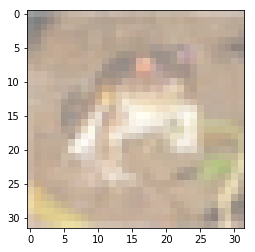

In [86]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.ion() #Turn interactive mode on.

trainset = torchvision.datasets.CIFAR10(root='./cifar10', train=True,
                                        download=True, transform=transforms.ToTensor())
print("train : " + str(len(trainset)) + ' images')
image, label=trainset[0]
image=image / 2 + 0.5
image=np.transpose(image, (1,2,0))
plt.imshow(image)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

dataiter = iter(trainloader)
batch, labels = dataiter.next()
batch.shape

In [ ]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self):
        # TODO
        # 1. Initialize file paths or a list of file names. 
        pass
    def __getitem__(self, index):
        # TODO
        # 1. Read one data from file (e.g. using numpy.fromfile, PIL.Image.open).
        # 2. Preprocess the data (e.g. torchvision.Transform).
        # 3. Return a data pair (e.g. image and label).
        pass
    def __len__(self):
        # You should change 0 to the total size of your dataset.
        return 0 

In [96]:
model=torchvision.models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False
    
model.fc = nn.Linear(model.fc.in_features, 2)


tensor([[ 9.8261e-02,  3.1757e-01],
        [ 5.9651e-01,  2.3505e-01],
        [-2.7007e-01,  3.3280e-01],
        [ 1.5449e+00,  1.1857e-01],
        [ 8.6832e-02,  8.6872e-02],
        [ 3.9946e-02, -5.1922e-01],
        [ 1.2004e-01, -1.1210e-01],
        [ 4.5987e-01, -2.1045e-01],
        [ 9.8672e-01,  8.0520e-01],
        [ 2.5069e-01,  2.3062e-01],
        [ 2.7493e-01,  1.2788e-01],
        [-2.9955e-01, -1.3733e-01],
        [ 2.6067e-01,  9.5731e-01],
        [ 2.0160e-01, -1.7423e-01],
        [ 4.7966e-03,  5.1126e-01],
        [ 2.4710e-01, -9.1190e-02],
        [ 8.5354e-02, -4.3065e-01],
        [ 2.3931e-01, -2.5917e-01],
        [-5.1408e-02,  5.2848e-02],
        [ 7.2321e-02,  3.8263e-02],
        [ 9.6775e-01,  1.0882e+00],
        [ 1.8452e-01, -1.9372e-02],
        [-4.7778e-02,  9.9535e-03],
        [ 3.3561e-02, -3.2365e-01],
        [ 3.9320e-01,  3.7225e-01],
        [-2.0366e-03, -6.8265e-02],
        [ 1.1546e-01, -7.7797e-01],
        [ 5.3543e-01, -2.338

In [98]:
torch.save(model, 'model.ckpt')
model = torch.load('model.ckpt')

torch.save(model.state_dict(), 'params.ckpt')
model.load_state_dict(torch.load('params.ckpt'))